# Data Analysis

In [3]:
!gdown --id 1_OuSRzdVgy2CkbOMc80us9zWzenEfx54

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_OuSRzdVgy2CkbOMc80us9zWzenEfx54
To: /content/Heart_Disease_Prediction.csv
100% 12.9k/12.9k [00:00<00:00, 29.1MB/s]


In [4]:
import pandas as pd
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [ ]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [6]:
df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
# handle categorical features
le = LabelEncoder()
df["Heart Disease"] = le.fit_transform(df["Heart Disease"])
df["Heart Disease"]

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

# Random Forest  Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
# Separate features and target variables
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [12]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100,max_depth=50)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50)

# Feature Extraction/Importance

In [13]:
import numpy as np
# Print the feature importance scores
importances = clf.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature names and their importances
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]} - {importances[indices[f]]}")

Thallium - 0.11958517432889326
Max HR - 0.11484444258791252
Chest pain type - 0.11156268548609799
ST depression - 0.09996105745141798
Cholesterol - 0.08575776647980135
index - 0.08344554145869701
Number of vessels fluro - 0.08125565909786213
Age - 0.07490227361461171
BP - 0.07392099340416798
Slope of ST - 0.05785692621902287
Exercise angina - 0.04403018424862779
Sex - 0.02954588498207085
EKG results - 0.01646127321499587
FBS over 120 - 0.0068701374258206245


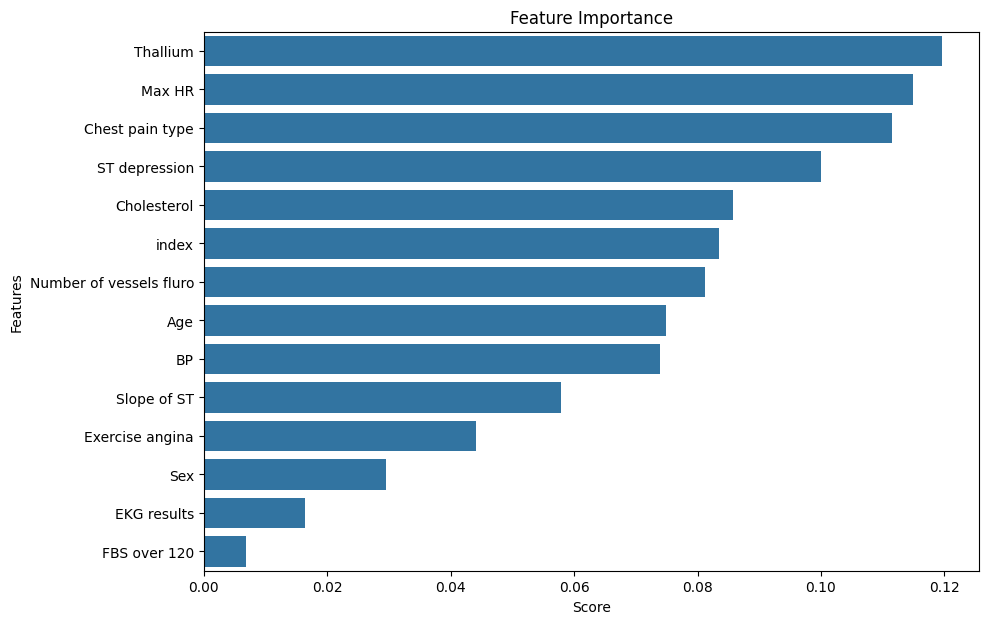

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the feature importance
plt.figure(figsize=(10,7))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()

<Axes: >

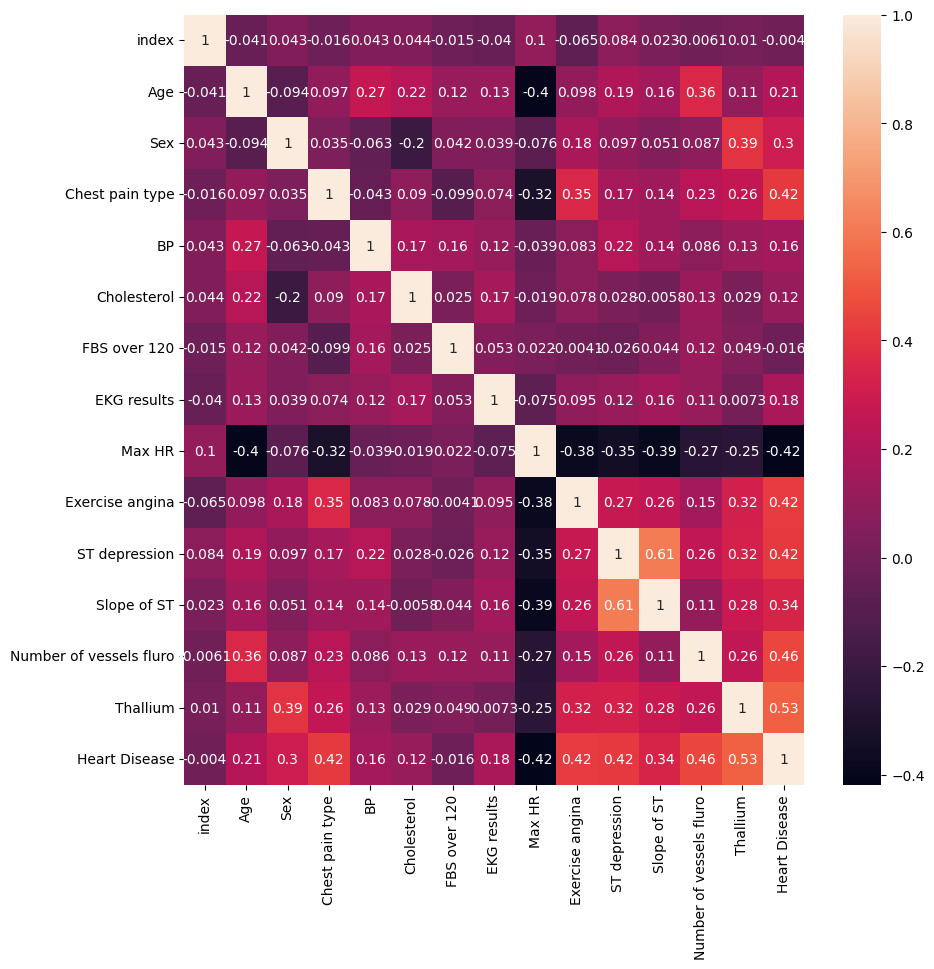

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

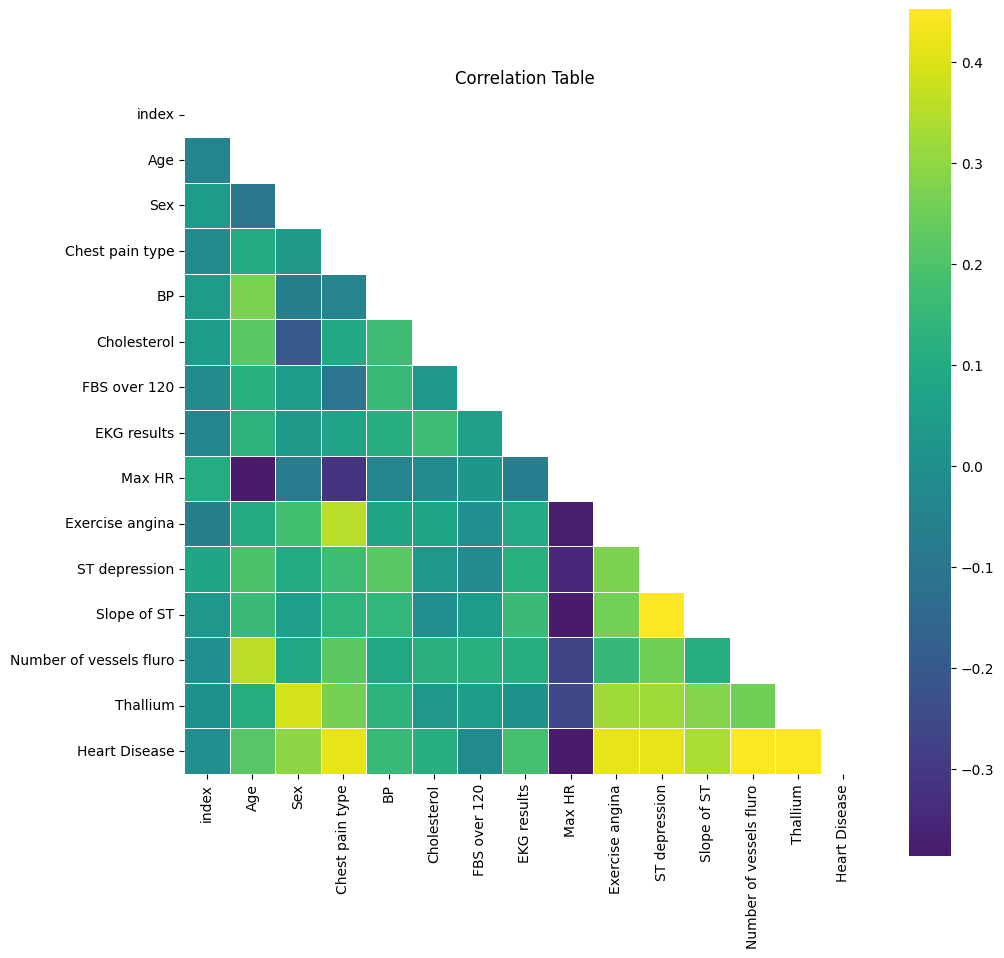

In [16]:
plt.figure(figsize = (11,11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

In [17]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 ,"%")

Accuracy: 87.03703703703704 %


In [18]:
# Use the validation data to evaluate model accuracy
val_accuracy = clf.score(X_test, y_test)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.8703703703703703


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.86      0.83      0.84        23

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54

[[28  3]
 [ 4 19]]


In [20]:
v1=int(input("Enter your Age  :"))


Enter your Age  :5


In [21]:
v2=input("Enter m for male and f for female :")
if (v2=="m" or v2=="M"):
  v2=1
else:
  v2=0

Enter m for male and f for female :m


In [22]:
"""from skimage import io

img = io.imread("sheep.png")
io.imshow(img)"""

'from skimage import io\n \nimg = io.imread("sheep.png")\nio.imshow(img)'

In [24]:
v3=int(input("Enter Chest Pain Type \nEnter 1 for pressure in chest \nEnter 2 for Fullness \nEnter 3 for Burning sensation \nEnter 4 for Tightness in chest \n"))
if(v3>4 or v3<1):
  print("Invalid Input")
print (v3)

Enter Chest Pain Type 
Enter 1 for pressure in chest 
Enter 2 for Fullness 
Enter 3 for Burning sensation 
Enter 4 for Tightness in chest 
4
4


In [25]:
v4=int(input("Enter Your Blood Pressure  : "))

Enter Your Blood Pressure  : 49


In [26]:
v5=int(input("Enter Your Cholestrol  : "))

Enter Your Cholestrol  : 40


In [27]:
v6=int(input("Enter your Fasting Blood Sugar :"))
if(v6>120):
  v6=v6*0 + 1;
else:
  v6=v6*0;
print (v6)

Enter your Fasting Blood Sugar :30
0


In [28]:
v7=int(input("Enter ECG Result  : "))

Enter ECG Result  : 3


In [29]:
v8=int(input("Enter Your Maximum recorded Heart Rate  : "))

Enter Your Maximum recorded Heart Rate  : 4


In [30]:
v9=int(input("Do you feel Heart Pain during Exercise or after walking ? \nEnter 1 if yes \nEnter 0 if no \n"))

Do you feel Heart Pain during Exercise or after walking ? 
Enter 1 if yes 
Enter 0 if no 
1


In [31]:
v10=float(input("Enter ST Depression : "))

Enter ST Depression : 43


In [32]:
v11=int(input("Enter Slope of ST  : "))

Enter Slope of ST  : 34


In [33]:
v12=int(input("Enter The Number of Vessel Fluro  : "))

Enter The Number of Vessel Fluro  : 343


In [34]:
v13=int(input("Enter Thallium : "))

Enter Thallium : 433


In [35]:
X_new = [[0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13]]
y_pred = clf.predict(X_new)
print (y_pred)
if (y_pred==1):
  print ("Heart Disease Risk")
else:
  print("Healthy")


[1]
Heart Disease Risk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
